# K Means Clustering to Solve Mall Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
cust_data=pd.read_csv("Mall_Customers.csv")
cust_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0
5,6,Female,22.0,17.0,76.0
6,7,Female,35.0,18.0,6.0
7,8,Female,NaN,18.0,94.0
8,9,Male,64.0,19.0,3.0
9,10,Female,30.0,19.0,72.0


# 1. Data Exploration

In [3]:
#Finding No. Of Rows & Colomns
print("Size of Dataset is:- ",cust_data.shape)
print("Number of rows in Dataset are:- ",cust_data.shape[0])
print("Number of colomns in Dataset are:- ",cust_data.shape[1])

Size of Dataset is:-  (250, 5)
Number of rows in Dataset are:-  250
Number of colomns in Dataset are:-  5


In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              250 non-null    int64  
 1   Gender                  250 non-null    object 
 2   Age                     246 non-null    float64
 3   Annual Income (k$)      248 non-null    float64
 4   Spending Score (1-100)  246 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.9+ KB


In [5]:
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,246.000000,248.000000,246.000000
mean,125.500000,38.552846,95.745968,49.991870
std,72.312977,13.152917,77.503167,27.407133
min,1.000000,18.000000,15.000000,1.000000
25%,63.250000,29.250000,47.000000,27.000000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,47.750000,101.000000,74.750000
max,250.000000,70.000000,325.000000,99.000000


In [6]:
#Finbding Null/Missing values
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       4
Annual Income (k$)        2
Spending Score (1-100)    4
dtype: int64

In [7]:
#Filling Misssing Values

#For Age Column
cust_data['Age'].fillna(cust_data['Age'].mean(),inplace=True)
print("Number of NaN Values in Age Column:- ",cust_data['Age'].isnull().sum())

#For 'Annual Income (k$)' Column
cust_data['Annual Income (k$)'].fillna(cust_data['Annual Income (k$)'].mean(),inplace=True)
print("\nNumber of NaN Values in Annual Income (k$) Column:- ",cust_data['Annual Income (k$)'].isnull().sum())

#For 'Spending Score (1-100)' Column
cust_data['Spending Score (1-100)'].fillna(cust_data['Spending Score (1-100)'].mean(),inplace=True)
print("\nNumber of NaN Values in Spending Score (1-100) Column:- ",cust_data['Spending Score (1-100)'].isnull().sum())


Number of NaN Values in Age Column:-  0

Number of NaN Values in Annual Income (k$) Column:-  0

Number of NaN Values in Spending Score (1-100) Column:-  0


In [8]:
#Checking Null/Missing values
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
cust_data.drop("CustomerID",axis=1,inplace=True)
cust_data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19.000000,15.0,39.0
1,Male,21.000000,15.0,81.0
2,Female,20.000000,16.0,6.0
3,Female,23.000000,16.0,77.0
4,Female,31.000000,17.0,40.0
5,Female,22.000000,17.0,76.0
6,Female,35.000000,18.0,6.0
7,Female,38.552846,18.0,94.0
8,Male,64.000000,19.0,3.0
9,Female,30.000000,19.0,72.0


In [10]:
Gender_n=pd.get_dummies(cust_data["Gender"])
Gender_n

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
245,0,1
246,1,0
247,0,1
248,1,0


In [11]:
Gender_n.drop("Female",axis=1,inplace=True)

In [12]:
Gender_n

,Male
0,1
1,1
2,0
3,0
4,0
...,...
245,1
246,0
247,1
248,0


In [13]:
cust_data=pd.concat([cust_data,Gender_n], axis = 1)

In [14]:
cust_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,Male,19.0,15.0,39.00000,1
1,Male,21.0,15.0,81.00000,1
2,Female,20.0,16.0,6.00000,0
3,Female,23.0,16.0,77.00000,0
4,Female,31.0,17.0,40.00000,0
...,...,...,...,...,...
245,Male,30.0,297.0,49.99187,1
246,Female,56.0,311.0,14.00000,0
247,Male,29.0,313.0,90.00000,1
248,Female,19.0,316.0,32.00000,0


In [15]:
cust_data.drop("Gender",axis=1,inplace=True)
cust_data.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19.000000,15.0,39.0,1
1,21.000000,15.0,81.0,1
2,20.000000,16.0,6.0,0
3,23.000000,16.0,77.0,0
4,31.000000,17.0,40.0,0
5,22.000000,17.0,76.0,0
6,35.000000,18.0,6.0,0
7,38.552846,18.0,94.0,0
8,64.000000,19.0,3.0,1
9,30.000000,19.0,72.0,0


# 2. Visualizing & Understanding 

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

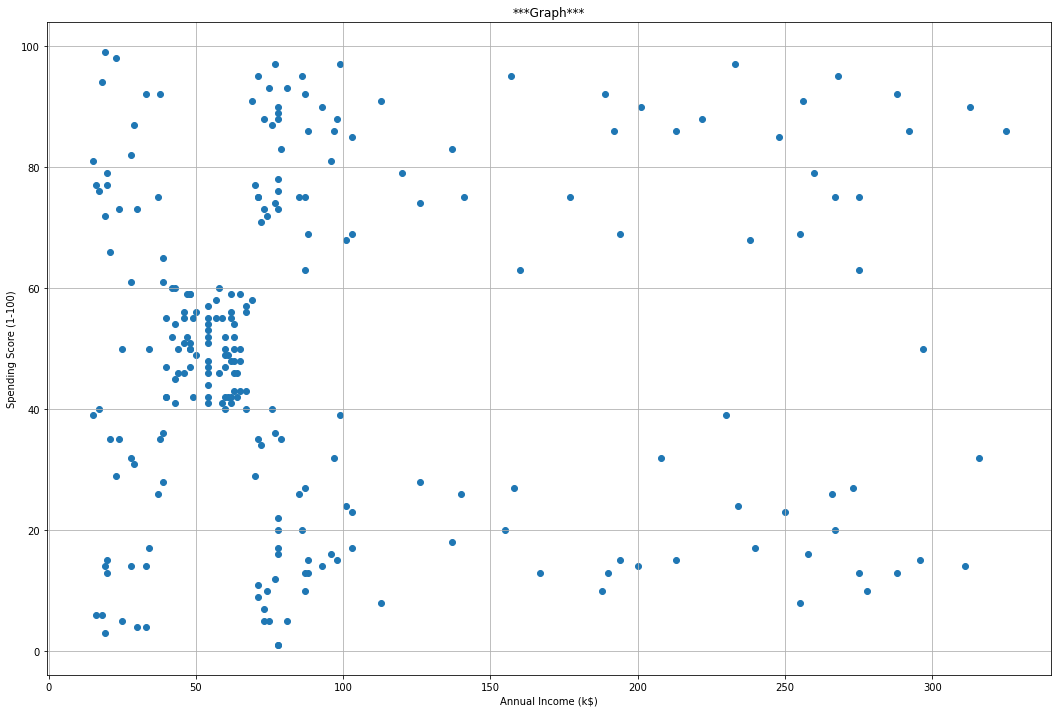

In [17]:
plt.figure(figsize=(18,12))

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.title('***Graph***')
plt.grid(True)
  

plt.scatter(cust_data['Annual Income (k$)'],cust_data['Spending Score (1-100)'])
plt.show()

It required to scale the  Data

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#for Income
scaler.fit(cust_data[["Annual Income (k$)"]])
cust_data["Annual Income (k$)"]=scaler.transform(cust_data[["Annual Income (k$)"]])

In [19]:
#Scaling for Spending
scaler.fit(cust_data[["Spending Score (1-100)"]])
cust_data["Spending Score (1-100)"]=scaler.transform(cust_data[["Spending Score (1-100)"]])

As Data points are closer to each other we have to use 'Elbow Method' to find numbers of Clusters 

In [20]:
#Finding SSE for elboe method
sse=[]
k_rng=range(1,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(cust_data[["Annual Income (k$)","Spending Score (1-100)"]])
    sse.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

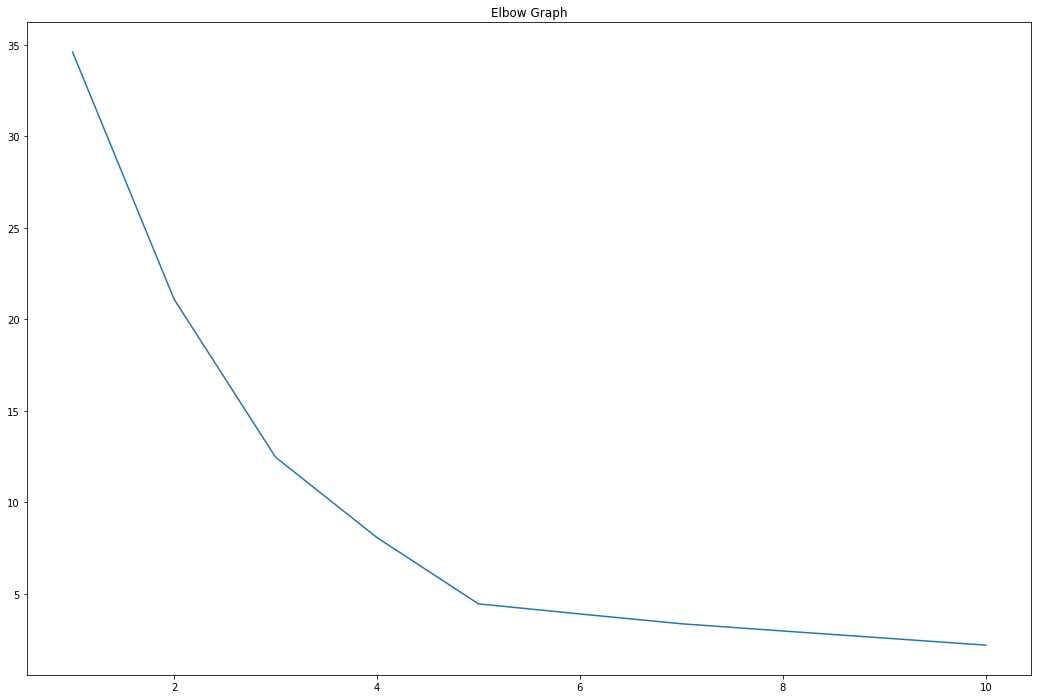

In [21]:
plt.figure(figsize=(18,12))
plt.plot(k_rng,sse)
plt.title("Elbow Graph")

As we have seen in above "Elbow Graph" there are two elbow points from which graph is turning sharply. But after 5 there is no
measure change in graph thats why we will take our "Numbers of Clusters=5"(k=5)

# 3. Implementation of K-Means Algorithm

In [22]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(cust_data[["Annual Income (k$)","Spending Score (1-100)"]])


KMeans(n_clusters=5)

In [23]:
y_pred=km.fit_predict(cust_data[["Annual Income (k$)","Spending Score (1-100)"]])

In [24]:
y_pred

array([4, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 4, 0, 2, 4, 2,
       0, 4, 0, 2, 4, 4, 4, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 4, 2, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 1, 3, 1])

In [25]:
cust_data["Clusters"]=y_pred
cust_data.head(20)

,Age,Annual Income (k$),Spending Score (1-100),Male,Clusters
0,19.000000,0.000000,0.387755,1,4
1,21.000000,0.000000,0.816327,1,2
2,20.000000,0.003226,0.051020,0,0
3,23.000000,0.003226,0.775510,0,2
4,31.000000,0.006452,0.397959,0,4
5,22.000000,0.006452,0.765306,0,2
6,35.000000,0.009677,0.051020,0,0
7,38.552846,0.009677,0.948980,0,2
8,64.000000,0.012903,0.020408,1,0
9,30.000000,0.012903,0.724490,0,2


In [26]:
#Creating saperate Dataframe for Each Custer
df0=cust_data[cust_data["Clusters"]==0]
df1=cust_data[cust_data["Clusters"]==1]
df2=cust_data[cust_data["Clusters"]==2]
df3=cust_data[cust_data["Clusters"]==3]
df4=cust_data[cust_data["Clusters"]==4]

In [27]:
print("\nNumber of Data points In Cluster 1:- ",df0.shape[0])
print("\nNumber of Data points In Cluster 2:- ",df1.shape[0])
print("\nNumber of Data points In Cluster 3:- ",df2.shape[0])
print("\nNumber of Data points In Cluster 4:- ",df3.shape[0])
print("\nNumber of Data points In Cluster 5:- ",df4.shape[0])


Number of Data points In Cluster 1:-  49

Number of Data points In Cluster 2:-  23

Number of Data points In Cluster 3:-  56

Number of Data points In Cluster 4:-  24

Number of Data points In Cluster 5:-  98


In [28]:
df0.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Male,Clusters
2,20.0,0.003226,0.051020,0,0
6,35.0,0.009677,0.051020,0,0
8,64.0,0.012903,0.020408,1,0
10,67.0,0.012903,0.132653,1,0
12,58.0,0.016129,0.142857,0,0
14,37.0,0.016129,0.122449,1,0
18,52.0,0.025806,0.285714,1,0
22,46.0,0.032258,0.040816,0,0
24,54.0,0.041935,0.132653,0,0
30,60.0,0.048387,0.030612,1,0


# 4.Plotting Scatterplot for each Cluster

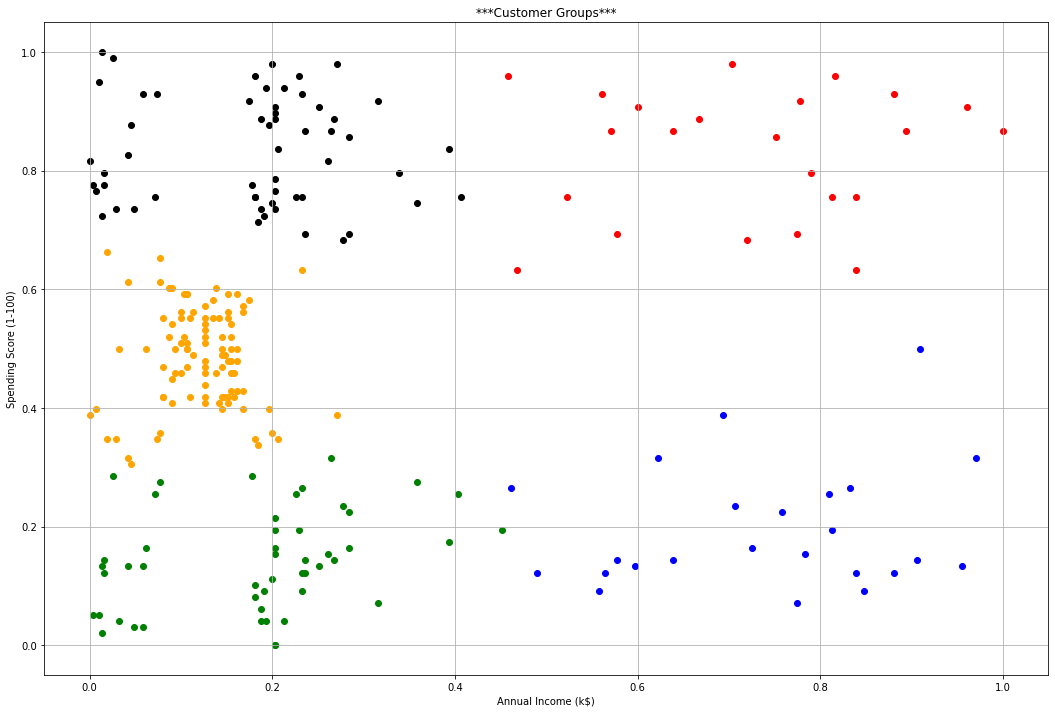

In [29]:
plt.figure(figsize=(18,12))

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.title('***Customer Groups***')
plt.grid(True)

plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],color="green")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color="red")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color="black")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color="blue")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color="orange")

plt.show()


# 5. Finding the Centroids of each Cluster and plotting on graph

In [30]:
centro=km.cluster_centers_
centro

array([[0.18181343, 0.14244065],
       [0.7227209 , 0.83052351],
       [0.17688629, 0.8321793 ],
       [0.73817204, 0.19642511],
       [0.1220869 , 0.48552432]])

[]

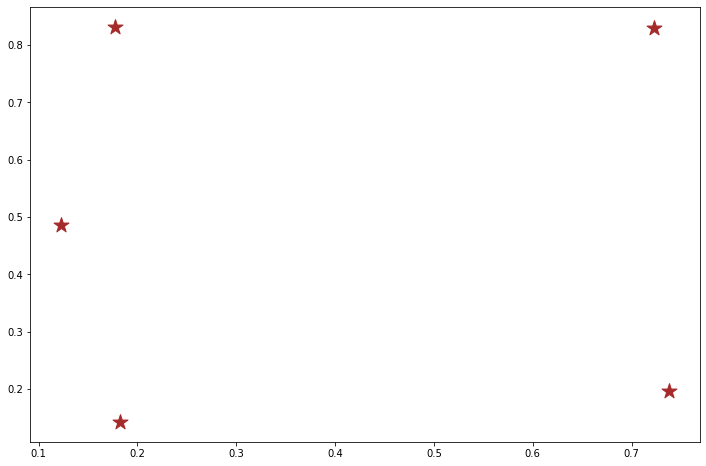

In [31]:
#plotting Centroids of each Cluster on graph
plt.figure(figsize=(12,8))
plt.scatter(centro[:,0],centro[:,1],s=250,color="brown",marker="*")
plt.plot()


# 6.Final Graph of KMeans Clustering 

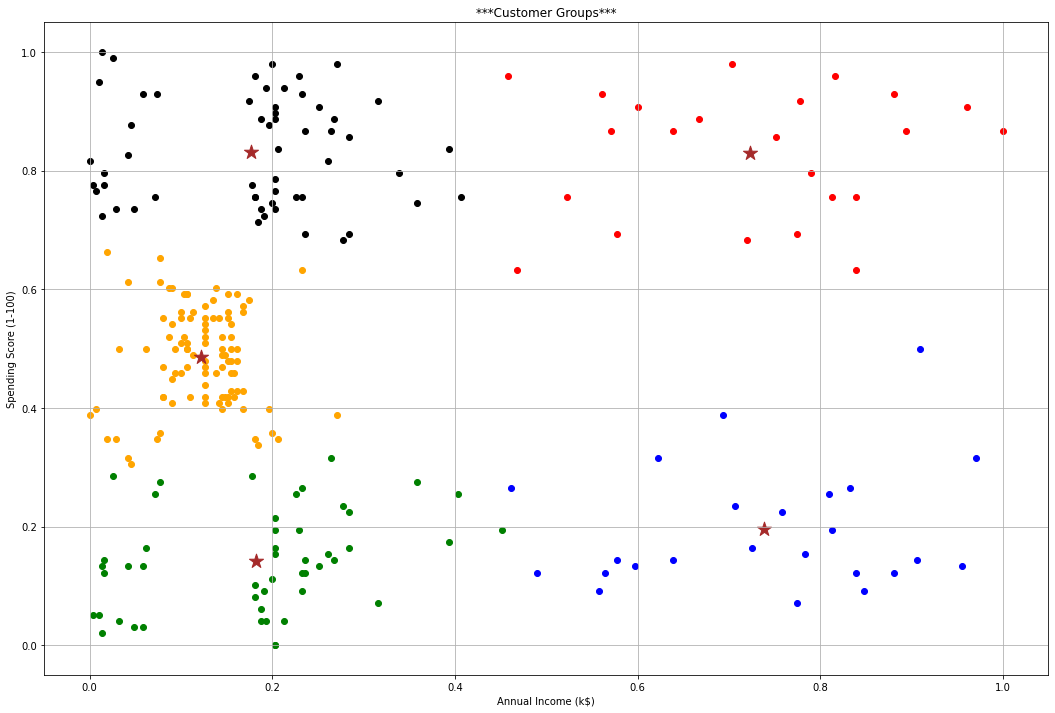

In [32]:
plt.figure(figsize=(18,12))

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.title('***Customer Groups***')
plt.grid(True)

plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],color="green",label="Cluster 1")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color="red",label="Cluster 2")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color="black",label="Cluster 3")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color="blue",label="Cluster 4")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color="orange",label="Cluster 5")

plt.scatter(centro[:,0],centro[:,1],s=220,color="brown",marker="*")
plt.show()


# 7. Checking Prdiction